In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
Annual_Gold_Value_In_Yen = pd.read_csv("Resources/output_Annual_Gold_Value_In_Yen.csv")
inflation_rates = pd.read_csv("Resources/inflation_rates_2013-2021.csv")
China_inflation_rates = inflation_rates[inflation_rates['country'] == 'China']
China_inflation_rates = inflation_rates[inflation_rates['country'] == 'China']

In [5]:
merged_data = pd.merge(Annual_Gold_Value_In_Yen, China_inflation_rates, left_on='Year', right_on='year', how='inner')
starting_gold_value = merged_data['Gold_Value_In_Yen'].iloc[0]
merged_data['Adjusted_Gold_Value_In_Yen'] = starting_gold_value * (1 + merged_data['inflation rate'] / 100).cumprod()
merged_data.drop(columns=['country', 'currency', 'inflation rate'], inplace=True)
merged_data.drop(columns=['year'], inplace=True)

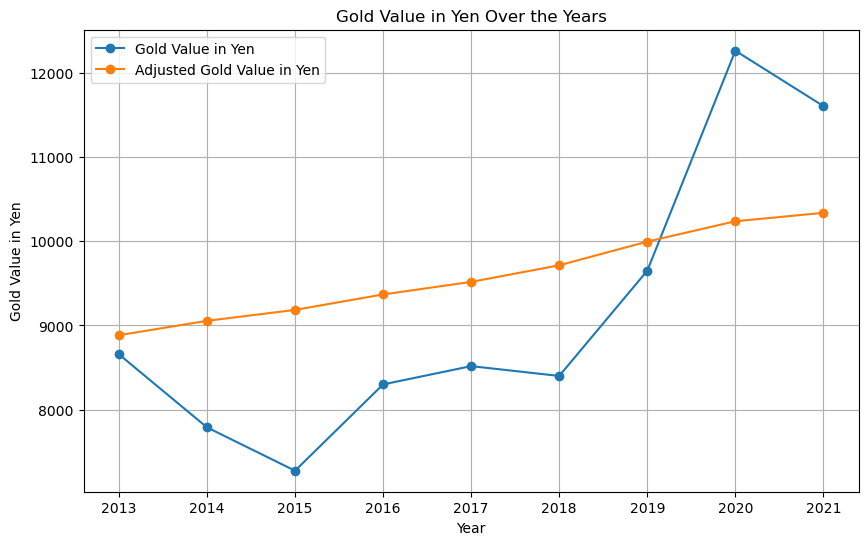

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Year'], merged_data['Gold_Value_In_Yen'], label='Gold Value in Yen', marker='o')
plt.plot(merged_data['Year'], merged_data['Adjusted_Gold_Value_In_Yen'], label='Adjusted Gold Value in Yen', marker='o')
plt.xlabel('Year')
plt.ylabel('Gold Value in Yen')
plt.title('Gold Value in Yen Over the Years')
plt.legend()
plt.grid(True)
plt.show()